1.Introduction and Background






When we talk about humanities, literature and literary theories are always the first to be mentioned as an important carrier of humanistic ideas. And in the current period of rapid development of the Internet, what topics are generally being studied in academic journals about literature? In order to explore this question, we decided to conduct a textual analysis of academic journals on literature for the whole year just past 2023. Due to the more stringent copyright restrictions on journals, we chose to download open-source journals based on the Scopus database. Also, since English is the most widely spoken language and has the largest number of journal articles written in English, we chose to limit the language used in the journals to English in order to find a more generalised answer.


Therefore, in this final project, we focus on journal articles within the scope of Literature and Literary theory from the Scopus database. There is our research question: Analyze the trends and preferences in topic selection of English literature journals on Scopus in the year 2023.







![Image Alt Text](image.png)


As you will see, our final group project look into the preferences and trends in journal topic selection, specifically targeting English-language literary journal articles in the Literature category on Scopus for the year 2023. We downloaded all the open-source English-language literary journal articles from the official Scopus website and scraped the articles into txt documents. This document cleaning provides accurate and convenient text data for further subsequent data processing and analysis. 

To help viewers better understand and learn the whole process of our project, our final group project is divided into three parts: 1:introduction and background；2:tutorials, 3:active learning exercises.

The goal of our project is to clarify a research question:What are the preferences of diverse English-language literature journals in Scopus for the year 2023?

2.Tutorials

(1) Collecting data

According to RQ, we chose to download all open access English journals published in 2023 from the Scopus database and classified under the Literature and literary theory category, a total of 1072 papers.It's worth noting that these papers are in pdf format now.

(2) Scrape all the pdf journal articles into txt files 

a) write the functions to load all the tools.

In [ ]:
%pip install spaCy
%pip install plotly

In [1]:
import spacy
!spacy download en_core_web_sm
import os
from spacy import displacy
import pandas as pd
pd.options.mode.chained_assignment = None 
import plotly.graph_objects as go
import plotly.express as px

'spacy' 不是内部或外部命令，也不是可运行的程序
或批处理文件。


b) write the function to load pyPDF2.

In [2]:
#pip install PyPDF2

c)write the functions to transfer all the pdf into txt files

In [3]:
#import PyPDF2

#pdf_file_path = 'your_pdf_file.pdf'
#txt_file_path = 'output_text_file.txt'

# Open PDF
#with open(pdf_file_path, 'rb') as file:
    #reader = PyPDF2.PdfFileReader(file)
    
    # Read every page
    #text = ''
    #for page in range(reader.numPages):
        #text += reader.getPage(page).extractText()

#with open(txt_file_path, 'w') as file:
    #file.write(text)

#print("PDF have transferred into TXT")

Finally, we can check the documents in our folder, to ensure all the PDF files are in txt format. In this research, we have already done this step, you can use the txt directly.

(3) Managing data

After converting the open acess English papers downloaded from Scopus into txt format, we put the txt texts of articles with cited scores of 0-0.1, 01-0.3 and 0.3 or above all together to clean the text and achieve tokenization of the text.

During this part spaCy is used for tokenization, or the segmentation of strings into individual words and punctuation markers. Tokenization enables spaCy to parse the grammatical structures of a text and identify characteristics of each word-like part-of-speech.


1.Installing, Importing and Preprocessing

a) The code reads all text files from a target directory, storing the contents and file names in two separate lists for subsequent analysis.

In [4]:
texts = []
file_names = []

# Iterate through each file in the folder
for _file_name in os.listdir('D:\CDfinal'):
# Look for only text files
    if _file_name.endswith('.txt'):
    # Append contents of each text file to text list
        texts.append(open('D:\CDfinal' + '/' + _file_name, 'r', encoding='utf-8').read())
        # Append name of each file to file name list
        file_names.append(_file_name)

b) Create a dictionary and convert it into a Pandas DataFrame.

In [5]:
# Create dictionary object associating each file name with its text
d = {'Filename':file_names,'Text':texts}
# Turn dictionary into a dataframe
journal_df = pd.DataFrame(d)

c) Turn dictionary into a dataframe

In [6]:
# Turn dictionary into a dataframe
journal_df = pd.DataFrame(d)

d) Display the first five rows of the DataFrame named ’journal_d‘

In [7]:
journal_df.head()

,Filename,Text
0,A-BirdsEye-View-over-Sydney-Animal-Imagery-in-...,"Alicante Journal of English Studies, Issue 38,..."
1,A-Brief-History-of-the-Theory-and-Practice-of-...,e-ISSN \n2724-3923\nmagazén\nVol. 1 – Num. 2 –...
2,A-Comparative-Study-of-the-Anthropocene-Factor...,Full Terms & Conditions of access and use can ...
3,A-Comparison-of-English-Acehnese-and-Indonesia...,1146 | Studies in English Language and Educati...
4,A-Comparison-of-Nishidas-basho-from-his-Middle...,71\nDOI: 10.4312/as.2023.11.1.71-90\nA Compari...


e) Remove extra spaces

In [8]:
# Remove extra spaces from papers
journal_df['Text'] = journal_df['Text'].str.replace('\s+', ' ', regex=True).str.strip()
journal_df.head()

,Filename,Text
0,A-BirdsEye-View-over-Sydney-Animal-Imagery-in-...,"Alicante Journal of English Studies, Issue 38,..."
1,A-Brief-History-of-the-Theory-and-Practice-of-...,e-ISSN 2724-3923 magazén Vol. 1 – Num. 2 – Dec...
2,A-Comparative-Study-of-the-Anthropocene-Factor...,Full Terms & Conditions of access and use can ...
3,A-Comparison-of-English-Acehnese-and-Indonesia...,1146 | Studies in English Language and Educati...
4,A-Comparison-of-Nishidas-basho-from-his-Middle...,71 DOI: 10.4312/as.2023.11.1.71-90 A Compariso...


f) Remove .txt from title of each article

In [9]:
# Remove .txt from title of each paper
journal_df['Filename'] = journal_df['Filename'].str.replace('.txt', '', regex=True)

Let's check the head of the DataFrame again to confirm everything has worked well.

g) Display the first five rows of the DataFrame named ’journal_df‘

In [11]:
# Print DataFrame
journal_df.head()

,Filename,Text
0,A-BirdsEye-View-over-Sydney-Animal-Imagery-in-...,"Alicante Journal of English Studies, Issue 38,..."
1,A-Brief-History-of-the-Theory-and-Practice-of-...,e-ISSN 2724-3923 magazén Vol. 1 – Num. 2 – Dec...
2,A-Comparative-Study-of-the-Anthropocene-Factor...,Full Terms & Conditions of access and use can ...
3,A-Comparison-of-English-Acehnese-and-Indonesia...,1146 | Studies in English Language and Educati...
4,A-Comparison-of-Nishidas-basho-from-his-Middle...,71 DOI: 10.4312/as.2023.11.1.71-90 A Compariso...


Now the resulting DataFrame is now ready for analysis.

(4) Tokenization

We want the dataframe presents some columns we want for better subsequent analysis. So we added two columns "title" and "department".

In [13]:
def split_and_create_journal_columns(Filename):
    """
    Split a filename based on '2023' and create 'title' and 'department' columns.

    Parameters:
    - Filename (str): Input filename containing '2023'.

    Returns:
    - pd.Series: Pandas Series with 'title' and 'department' columns.
    """
    # Split the filename based on '2023'
    parts = Filename.split('2023', 1)
    
    # Extract 'title' and 'department', replacing '-' with whitespace
    title = parts[0].strip().replace('-', ' ')
    department = parts[1].strip().replace('-', ' ') if len(parts) > 1 else None
    
    return pd.Series({'title': title, 'department': department})

# Apply the function to the 'filename' column to create new 'title' and 'department' columns
journal_df[['title', 'department']] = journal_df['Filename'].apply(split_and_create_journal_columns)

# Print the resulting DataFrame
journal_df.head()

,Filename,Text,title,department
0,A-BirdsEye-View-over-Sydney-Animal-Imagery-in-...,"Alicante Journal of English Studies, Issue 38,...",A BirdsEye View over Sydney Animal Imagery in ...,_Universidad de Alicante
1,A-Brief-History-of-the-Theory-and-Practice-of-...,e-ISSN 2724-3923 magazén Vol. 1 – Num. 2 – Dec...,A Brief History of the Theory and Practice of ...,None
2,A-Comparative-Study-of-the-Anthropocene-Factor...,Full Terms & Conditions of access and use can ...,A Comparative Study of the Anthropocene Factor...,_Informa Healthcare
3,A-Comparison-of-English-Acehnese-and-Indonesia...,1146 | Studies in English Language and Educati...,A Comparison of English Acehnese and Indonesia...,_Syiah Kuala University
4,A-Comparison-of-Nishidas-basho-from-his-Middle...,71 DOI: 10.4312/as.2023.11.1.71-90 A Compariso...,A Comparison of Nishidas basho from his Middle...,_University of Ljubljana Press


In [14]:
journal_df['department'] = journal_df['department'].str.replace('_', ' ').str.replace('.txt', '')

C:\Users\cathy\AppData\Local\Temp\ipykernel_32568\4031396688.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  journal_df['department'] = journal_df['department'].str.replace('_', ' ').str.replace('.txt', '')


a) Use .head( ) to check the result .

In [15]:
journal_df.head()

,Filename,Text,title,department
0,A-BirdsEye-View-over-Sydney-Animal-Imagery-in-...,"Alicante Journal of English Studies, Issue 38,...",A BirdsEye View over Sydney Animal Imagery in ...,Universidad de Alicante
1,A-Brief-History-of-the-Theory-and-Practice-of-...,e-ISSN 2724-3923 magazén Vol. 1 – Num. 2 – Dec...,A Brief History of the Theory and Practice of ...,None
2,A-Comparative-Study-of-the-Anthropocene-Factor...,Full Terms & Conditions of access and use can ...,A Comparative Study of the Anthropocene Factor...,Informa Healthcare
3,A-Comparison-of-English-Acehnese-and-Indonesia...,1146 | Studies in English Language and Educati...,A Comparison of English Acehnese and Indonesia...,Syiah Kuala University
4,A-Comparison-of-Nishidas-basho-from-his-Middle...,71 DOI: 10.4312/as.2023.11.1.71-90 A Compariso...,A Comparison of Nishidas basho from his Middle...,University of Ljubljana Press


b) Besides, we want the dataframe contains Digital Object Identifier（DOI） of each paper.

In [16]:
import re
def extract_doi_from_text(Text):
    """
    Extract DOI from a text using a regular expression.

    Parameters:
    - Text (str): Input text containing DOI.

    Returns:
    - str or None: Extracted DOI or None if not found.
    """
    doi_match = re.search(r'\bdoi:?\s*10\.\S+', Text, flags=re.IGNORECASE)
    return doi_match.group() if doi_match else None

# Apply the function to the 'text' column to create a new 'doi' column
journal_df['doi'] = journal_df['Text'].apply(extract_doi_from_text)

# Print the resulting DataFrame
journal_df.head(10)


,Filename,Text,title,department,doi
0,A-BirdsEye-View-over-Sydney-Animal-Imagery-in-...,"Alicante Journal of English Studies, Issue 38,...",A BirdsEye View over Sydney Animal Imagery in ...,Universidad de Alicante,None
1,A-Brief-History-of-the-Theory-and-Practice-of-...,e-ISSN 2724-3923 magazén Vol. 1 – Num. 2 – Dec...,A Brief History of the Theory and Practice of ...,None,DOI 10.30687/mag/2724-3923/2020/02/002
2,A-Comparative-Study-of-the-Anthropocene-Factor...,Full Terms & Conditions of access and use can ...,A Comparative Study of the Anthropocene Factor...,Informa Healthcare,DOI: 10.1080/25723618.2023.2237369
3,A-Comparison-of-English-Acehnese-and-Indonesia...,1146 | Studies in English Language and Educati...,A Comparison of English Acehnese and Indonesia...,Syiah Kuala University,None
4,A-Comparison-of-Nishidas-basho-from-his-Middle...,71 DOI: 10.4312/as.2023.11.1.71-90 A Compariso...,A Comparison of Nishidas basho from his Middle...,University of Ljubljana Press,DOI: 10.4312/as.2023.11.1.71-90
5,A-Contrastive-Analysis-of-Morphological-and-Sy...,403 | Studies in English Language and Educatio...,A Contrastive Analysis of Morphological and Sy...,Syiah Kuala University,None
6,A-Cormorant-of-Libraries-The-FuturePast-of-Sus...,European journal of American studies 19-1 | 20...,A Cormorant of Libraries The FuturePast of Sus...,European Association for American Studies,DOI: 10.4000/ejas.20878
7,A-CorpusAssisted-Critical-Discourse-Analysis-o...,"3L: Language, Linguistics, Literature® The Sou...",A CorpusAssisted Critical Discourse Analysis o...,Penerbit Universiti Kebangsaan Malaysia,DOI: 10.24171/j.phrp.2021.0085
8,A-CorpusAssisted-Discourse-Analysis-Case-Study...,GEMA Online® Journal of Language Studies 34 Vo...,A CorpusAssisted Discourse Analysis Case Study...,Penerbit Universiti Kebangsaan Malaysia,doi:10.1177/1075547012459274
9,A-Corpusbased-Analysis-of-Frequently-Occurring...,"3L: Language, Linguistics, Literature® The Sou...",A Corpusbased Analysis of Frequently Occurring...,Penerbit Universiti Kebangsaan Malaysia,None


c) we clean the txt and make it a new column of our dataframe.

In [17]:
def clean_text(Text):
    # Remove special characters, digits, and punctuation
    text = re.sub(r'[^a-zA-Z\s]', '', Text)
    # Convert to lowercase
    text = text.lower()
    # Remove newline characters
    text = text.replace('\n', ' ')
    return text

# Apply the clean_text function to the 'text' column to create a new 'cleaned_text' column
journal_df['cleaned_text'] = journal_df['Text'].apply(clean_text)

In [18]:
journal_df.head(10)

,Filename,Text,title,department,doi,cleaned_text
0,A-BirdsEye-View-over-Sydney-Animal-Imagery-in-...,"Alicante Journal of English Studies, Issue 38,...",A BirdsEye View over Sydney Animal Imagery in ...,Universidad de Alicante,None,alicante journal of english studies issue pa...
1,A-Brief-History-of-the-Theory-and-Practice-of-...,e-ISSN 2724-3923 magazén Vol. 1 – Num. 2 – Dec...,A Brief History of the Theory and Practice of ...,None,DOI 10.30687/mag/2724-3923/2020/02/002,eissn magazn vol num december citation ...
2,A-Comparative-Study-of-the-Anthropocene-Factor...,Full Terms & Conditions of access and use can ...,A Comparative Study of the Anthropocene Factor...,Informa Healthcare,DOI: 10.1080/25723618.2023.2237369,full terms conditions of access and use can b...
3,A-Comparison-of-English-Acehnese-and-Indonesia...,1146 | Studies in English Language and Educati...,A Comparison of English Acehnese and Indonesia...,Syiah Kuala University,None,studies in english language and education ...
4,A-Comparison-of-Nishidas-basho-from-his-Middle...,71 DOI: 10.4312/as.2023.11.1.71-90 A Compariso...,A Comparison of Nishidas basho from his Middle...,University of Ljubljana Press,DOI: 10.4312/as.2023.11.1.71-90,doi as a comparison of nishidas basho from hi...
5,A-Contrastive-Analysis-of-Morphological-and-Sy...,403 | Studies in English Language and Educatio...,A Contrastive Analysis of Morphological and Sy...,Syiah Kuala University,None,studies in english language and education ...
6,A-Cormorant-of-Libraries-The-FuturePast-of-Sus...,European journal of American studies 19-1 | 20...,A Cormorant of Libraries The FuturePast of Sus...,European Association for American Studies,DOI: 10.4000/ejas.20878,european journal of american studies specia...
7,A-CorpusAssisted-Critical-Discourse-Analysis-o...,"3L: Language, Linguistics, Literature® The Sou...",A CorpusAssisted Critical Discourse Analysis o...,Penerbit Universiti Kebangsaan Malaysia,DOI: 10.24171/j.phrp.2021.0085,l language linguistics literature the southeas...
8,A-CorpusAssisted-Discourse-Analysis-Case-Study...,GEMA Online® Journal of Language Studies 34 Vo...,A CorpusAssisted Discourse Analysis Case Study...,Penerbit Universiti Kebangsaan Malaysia,doi:10.1177/1075547012459274,gema online journal of language studies volum...
9,A-Corpusbased-Analysis-of-Frequently-Occurring...,"3L: Language, Linguistics, Literature® The Sou...",A Corpusbased Analysis of Frequently Occurring...,Penerbit Universiti Kebangsaan Malaysia,None,l language linguistics literature the southeas...


Once the dataframe is ready, you can start language processing.

(5)  Language processing

The first step is to tokenize the text with NLP.

a) write functions to remove the stopwords

In [19]:
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download Stopwords
import nltk
nltk.download('stopwords')
nltk.download('punkt')

# Define a function to remove stop words
def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(text)
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

# apply function and create a new column
journal_df['clean_text_without_stopwords'] = journal_df['cleaned_text'].apply(remove_stopwords)

journal_df.head()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\cathy\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\cathy\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,Filename,Text,title,department,doi,cleaned_text,clean_text_without_stopwords
0,A-BirdsEye-View-over-Sydney-Animal-Imagery-in-...,"Alicante Journal of English Studies, Issue 38,...",A BirdsEye View over Sydney Animal Imagery in ...,Universidad de Alicante,None,alicante journal of english studies issue pa...,alicante journal english studies issue pages a...
1,A-Brief-History-of-the-Theory-and-Practice-of-...,e-ISSN 2724-3923 magazén Vol. 1 – Num. 2 – Dec...,A Brief History of the Theory and Practice of ...,None,DOI 10.30687/mag/2724-3923/2020/02/002,eissn magazn vol num december citation ...,eissn magazn vol num december citation beausan...
2,A-Comparative-Study-of-the-Anthropocene-Factor...,Full Terms & Conditions of access and use can ...,A Comparative Study of the Anthropocene Factor...,Informa Healthcare,DOI: 10.1080/25723618.2023.2237369,full terms conditions of access and use can b...,full terms conditions access use found httpsww...
3,A-Comparison-of-English-Acehnese-and-Indonesia...,1146 | Studies in English Language and Educati...,A Comparison of English Acehnese and Indonesia...,Syiah Kuala University,None,studies in english language and education ...,studies english language education pissn eissn...
4,A-Comparison-of-Nishidas-basho-from-his-Middle...,71 DOI: 10.4312/as.2023.11.1.71-90 A Compariso...,A Comparison of Nishidas basho from his Middle...,University of Ljubljana Press,DOI: 10.4312/as.2023.11.1.71-90,doi as a comparison of nishidas basho from hi...,doi comparison nishidas basho middle period pl...


b) write functions to display the word frequency

In [20]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize

# define a function to count word frequency
def word_frequency(text):
    words = word_tokenize(text)
    word_freq = Counter(words)
    return word_freq

# apply the function and create a new column called word_freq
journal_df['word_freq'] = journal_df['clean_text_without_stopwords'].apply(word_frequency)
journal_df['word_freq']

0       {'alicante': 17, 'journal': 18, 'english': 18,...
1       {'eissn': 21, 'magazn': 22, 'vol': 1, 'num': 1...
2       {'full': 5, 'terms': 4, 'conditions': 2, 'acce...
3       {'studies': 26, 'english': 248, 'language': 63...
4       {'doi': 1, 'comparison': 19, 'nishidas': 68, '...
                              ...                        
1067    {'gema': 18, 'online': 18, 'journal': 21, 'lan...
1068    {'literatura': 8, 'teora': 8, 'historia': 8, '...
1069    {'es': 24, 'review': 24, 'spanish': 24, 'journ...
1070    {'james': 27, 'baldwin': 51, 'review': 10, 'vo...
1071    {'servicio': 31, 'de': 86, 'publicaciones': 31...
Name: word_freq, Length: 1072, dtype: object

c) Through the word_freq, we can see some words that are not in English, let's update stopwords.

In [23]:
from collections import Counter
import re
from nltk.corpus import stopwords

stopwords_list = set(stopwords.words("english"))

total_word_freq = Counter()
for text in journal_df['word_freq']:
    # Check if 'text' is a Counter object, and if so, convert it to a space-separated string
    if isinstance(text, Counter):
        text = ' '.join(text.elements())

    
    cleaned_text = re.sub(r'[^a-zA-Z\s]', '', text)
    words = cleaned_text.lower().split()
    filtered_words = [word for word in words if word not in stopwords_list]
    total_word_freq.update(filtered_words)

# Get top 100
top_words = total_word_freq.most_common(100)

# print top 100 words and their frequncies
for word, freq in top_words:
    print(f"{word}: {freq}")


de: 155706
la: 82823
en: 60220
que: 53760
el: 48011
los: 27000
se: 24000
del: 23872
e: 22729
language: 21778
also: 21763
one: 21271
las: 20421
p: 18306
new: 18234
por: 17881
english: 17853
un: 16681
pp: 15991
con: 15325
al: 15300
una: 15210
como: 15175
university: 14546
studies: 14102
para: 13326
two: 12848
journal: 12364
first: 12021
time: 11775
es: 11702
world: 11637
research: 11551
su: 10961
social: 10654
american: 10068
press: 9906
different: 9836
life: 9612
vol: 9561
literature: 9490
used: 9338
use: 9315
et: 9265
work: 9129
however: 8998
writing: 8998
would: 8986
text: 8909
words: 8812
study: 8773
like: 8723
human: 8666
may: 8652
way: 8587
analysis: 8568
students: 8567
lo: 8536
see: 8508
translation: 8234
even: 8189
da: 8029
online: 7982
us: 7981
well: 7758
l: 7680
narrative: 7661
cultural: 7564
corpus: 7416
history: 7365
ms: 7304
could: 7244
people: 7199
novel: 7043
literary: 6898
c: 6894
nature: 6734
thus: 6537
texts: 6515
v: 6424
discourse: 6359
em: 6353
part: 6200
b: 6192
book

d) As we can see, there are a lot of meaningless words here, so we need to manually update the stopwords, delete them until they are meaningful for our study.

In [24]:
custom_stopwords = set(["language", "also", "one", "new", "p", "pp", "et", "al", "us", "however", "like", "could", "may", "even", "well", "would", "see", "etc","de","la","en","que","el","los","se","del","e","las","por","un","con","una","como","para","two","es","su","vol","lo","da","l","ms","c","v","em"
                       "b","x","n","b","este","ed","j","bas","entie","sobre","three","entre","doi","issn","r","english","university","studies","journal","first","used","use"
                       "time","xxix","dos","although","might","em","esta"])
stopwords_list.update(custom_stopwords)



total_word_freq = Counter()
for text in journal_df['word_freq']:
    if isinstance(text, Counter):
        text = ' '.join(text.elements())
    
    cleaned_text = re.sub(r'[^a-zA-Z\s]', '', text)
    words = cleaned_text.lower().split()
    filtered_words = [word for word in words if word not in stopwords_list]
    total_word_freq.update(filtered_words)


top_words = total_word_freq.most_common(100)

for word, freq in top_words:
    print(f"{word}: {freq}")


time: 11775
world: 11637
research: 11551
social: 10654
american: 10068
press: 9906
different: 9836
life: 9612
literature: 9490
use: 9315
work: 9129
writing: 8998
text: 8909
words: 8812
study: 8773
human: 8666
way: 8587
analysis: 8568
students: 8567
translation: 8234
online: 7982
narrative: 7661
cultural: 7564
corpus: 7416
history: 7365
people: 7199
novel: 7043
literary: 6898
nature: 6734
thus: 6537
texts: 6515
discourse: 6359
part: 6200
book: 6163
political: 6098
many: 6060
women: 6053
learning: 6043
within: 5987
since: 5924
another: 5833
context: 5825
form: 5819
york: 5750
historical: 5694
place: 5682
london: 5672
example: 5665
present: 5607
identity: 5566
culture: 5468
black: 5425
article: 5373
terms: 5346
sense: 5335
rather: 5307
around: 5249
case: 5219
author: 5217
order: 5149
role: 5120
works: 5104
word: 5044
experience: 5010
fact: 4991
space: 4971
knowledge: 4956
characters: 4935
years: 4882
process: 4869
published: 4851
questions: 4851
meaning: 4840
story: 4837
make: 4826
man: 4

e) We can now use wordcloud to show word frequency clearly and visually.

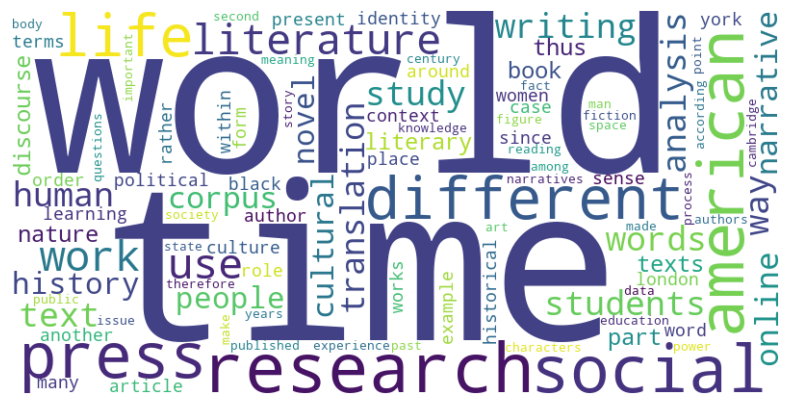

In [25]:
#pip install wordcloud (you need to pip install wordcloud)
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=400, max_words=100, background_color='white').generate_from_frequencies(total_word_freq)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

f) Now we could try to count the total words and then calculate the ratio.
For example, we could use the most frequent word "time" to apply on every row to caculate the ratio

In [29]:
# define a function
def count_unique_words(word_freq):
    return len(word_freq)

# 假设 'word_freq' 列包含 Counter 对象
journal_df['word_count'] = journal_df['word_freq'].apply(count_unique_words)
journal_df['word_count']


0       1894
1       2299
2       2070
3       1145
4       1731
        ... 
1067    1179
1068    1480
1069    2323
1070    1291
1071    1897
Name: word_count, Length: 1072, dtype: int64

In [34]:
result_df = pd.DataFrame()
def count_word_occurrences(word_freq, target_word):
    return word_freq.get(target_word, 0)

target_word = "time"
result_df['time_occurrences'] = journal_df['word_freq'].apply(lambda x: count_word_occurrences(x, target_word))
result_df['word_count'] = journal_df['word_count']

result_df['time_ratio'] = result_df['time_occurrences'] / result_df['word_count']
result_df['time_ratio']

0       0.000528
1       0.003480
2       0.005797
3       0.000873
4       0.002311
          ...   
1067    0.002545
1068    0.008108
1069    0.003013
1070    0.013168
1071    0.002636
Name: time_ratio, Length: 1072, dtype: float64

We can also draw a scatter plot for these data to make them more visual.

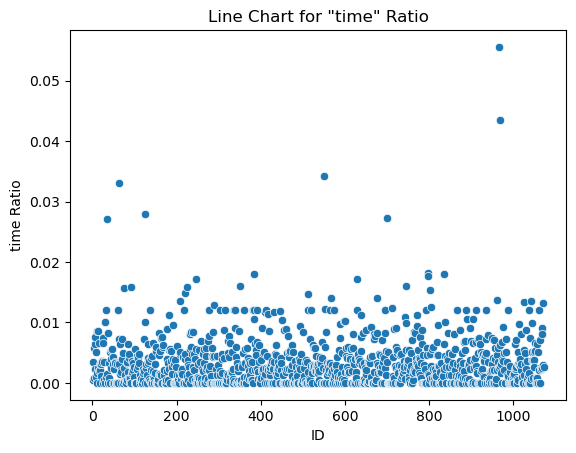

In [38]:
import seaborn as sns

result_df['ID'] = result_df.reset_index().index + 1

sns.scatterplot(x='ID', y='time_ratio', data=result_df, marker='o')

plt.title('Scatter plot for "time" Ratio')
plt.xlabel('ID')
plt.ylabel('time Ratio')

plt.show()



Also, we can use TF-IDF in this project.

TF-IDF (Term Frequency-Inverse Document Frequency) is a statistical method used to evaluate the importance of a word in a document set. It is a feature extraction technique commonly used in the field of information retrieval and text mining.


The calculation of TF-IDF is based on two core concep:1.



Term Frequency: Indicates how often a word appears in a document. The higher the TF value, the more important the word is in the ：

*TF(t,d)= 
Total number of terms in document  /
Number of occurrences of term t in document* d
2.​

Inverse Document Frequency (IDF): Measure the importance of a word in the overall document set. The higher the IDF value, the lower the importance of the term in the overall documentation:s

*IDF(t,D)=log(
Total number of documents in collection / Number of documents containing term t+1)*


The final TF-IDF value is the product of TF 
*and IDF
TF-IDF(t,d,D)=TF(t,d)×*IDF(t,D)document

In [40]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


We first need to apply the new stoplists(what we have updated) to cleaned_text. Then caculate the TF-IDF value.

In [47]:
journal_df['cleaned_text'] = journal_df['cleaned_text'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in stopwords_list]))

# Print the first few rows to check the result
print(journal_df['cleaned_text'].head())


0    alicante issue pages alicante revista alicanti...
1    eissn magazn num december citation beausang br...
2    full terms conditions access use found httpsww...
3    education pissn eissn comparison acehnese indo...
4    comparison nishidas basho middle period platos...
Name: cleaned_text, dtype: object


In [48]:
from sklearn.feature_extraction.text import TfidfVectorizer

documents = journal_df['cleaned_text'].tolist()

# Create TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the documents
tfidf_matrix = tfidf_vectorizer.fit_transform(documents)

# Get vocabulary and TF-IDF matrix
vocab = tfidf_vectorizer.get_feature_names_out()
dense_matrix = tfidf_matrix.toarray()

# Create DataFrame with TF-IDF scores
df_tfidf = pd.DataFrame(dense_matrix, columns=vocab)

# Sum the TF-IDF scores for each word across all documents
total_tfidf_scores = df_tfidf.sum()

# Find the top 10 words with the highest total TF-IDF scores
top_10_words = total_tfidf_scores.nlargest(20)

# Print the result
print("Top 10 words with highest TF-IDF scores:")
print(top_10_words)


Top 10 words with highest TF-IDF scores:
students       17.478202
american       15.816648
world          14.706175
translation    14.384711
writing        14.162745
research       14.033960
literature     13.807045
social         13.596250
time           12.620441
learning       12.336363
human          11.861210
study          11.716895
life           11.709119
women          11.482888
online         11.229262
text           11.167329
press          11.143615
use            11.051610
chinese        11.028762
bakhtiniana    11.005383
dtype: float64


By counting the word frequency and TF-IDF, we can derive a partial list of words, which also represent the more important (high-frequency) words in these articles. In terms of topic trends and preferences, we observe that the most frequent topics in English literary journals in 2023 are translation, writing, social and so on. In addition, we found some emerging themes, such as "women", which indicates a growing interest in feminism in the academic community.
However, we must also admit limitations of word frequency analysis in this kind of research. For example, word frequency analysis usually ignores the context of words, so certain difficulties may be encountered in identifying topics. The same keywords may have different meanings in different contexts, and this ambiguity is difficult to solve in word frequency analysis.

### Active Learning Exercises

Apart from the above exercises, we could also use these texts to practice Sentiment Analysis, so that find out what kind of emotional bias do literature and literary theory journals in English generally possess in 2023.

First, Import NLTK and Download Necessary Resources:

In [ ]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

# Download the VADER lexicon for sentiment analysis
nltk.download('vader_lexicon')

Initialize the Sentiment Intensity Analyzer:
Create an instance of the SentimentIntensityAnalyzer:

In [ ]:
sia = SentimentIntensityAnalyzer()

Apply Sentiment Analysis to DataFrame:
Apply the sentiment analysis to each row in the 'cleaned_text column

(The 'compound' score is a compound sentiment score that ranges from -1 (most negative) to 1 (most positive).):

In [ ]:
# write your code here = journal_df['cleaned_text'].apply(lambda x: sia.polarity_scores(x)['compound'])

Now you could create a new column called sentiment into journal_df and store the score.

In [ ]:
# write your code here

-1 indicates the most negative emotion.

1 indicates the most positive emotion.

0 is neutual

Now you can count how many positive, how many negative, and how many neutral there are in the journal df.

In [ ]:
# write your code here

Finally, Download the dataframe as a CSV (metadata)
First, you can also select partial columns.(If you do not need all the columns)

In [ ]:
# write your code here 
selected_columns = ['column1', 'column2', 'column3']

In [ ]:
selected_data = journal_df[selected_columns]

In [ ]:
selected_data.to_csv('metadata.csv', index=False)

References

Chaudhary, K. (2020). Sentiment analysis with python: TFIDF features. Drops of AI. Retrieved January 17, 2023, from https://dropsofai.com/sentiment-analysis-with-python-tfidf-features/


Qaiser, S., & Ali, R. (2018). Text Mining: Use of TF-IDF to Examine the Relevance of Words to Documents. International Journal of Computer Applications, 181(1), 25–29. https://doi.org/10.5120/ijca2018917395

Scopus. https://www.scopus.com/home.uri
